# Superdense Coding

### Introduction

Superdense coding is a procedure that allows a person to send two classical bits to another party by just using one qubit. This is done using the property of quantum entanglement.
Consider a case where there are two people, say Alice and Bob. In a usual scenario to send 2 bits of data through classical channels, Alice would need two bits. But Alice and Bob could use the quantum properties to use just one qubit to send this data. For this initially they need to share a maximally entangled pair of qubits(Bell pair). Alice then selects one of the four possible messages that could be send using two bits (00, 01, 10, 11). Once she selects the messages she encodes it using the corresponding quantum gates. After this, Alice sends her qubit to Bob and then he decodes the message by undoing the entangling operation. 

### Steps

1. Alice and Bob initially share a Bell pair. This can be done by initially starting with two qubits, in this case two |0> state and then apply the Hadamard gate (H gate) to the first qubit. Then they are passed through a CNOT gate (CX gate) and this produces a bell pair. Alice holds one of the qubits and Bob holds the other qubit.
2. Alice then selects the message she want to send and applies the corresponding quantum gate transformation according to table 1. 
3. Alice sends her qubit to Bob.
4. Bob then undoes the entangling by first passing the qubits through a CNOT gate and then applying a H gate. This restores the classical message.


##### Table 1

| Message | Alice's encoding gate | State Bob receives | After applying CNOT gate | After applying 𝐻 gate (Final) |
| :---: | :---: | :---: | :---: | :---: |
| 00 | 𝐼 | \|00⟩ + \|11⟩ | \|00⟩ + \|10⟩ | \|00⟩
| 01 | 𝑋 | \|10⟩ + \|01⟩ | \|11⟩ + \|01⟩ | \|01⟩
| 10 | 𝑍 | \|00⟩ - \|11⟩ | \|00⟩ - \|10⟩ | \|10⟩
| 11 | 𝑍𝑋 | \|01⟩ - \|10⟩ | \|01⟩ - \|11⟩ | \|11⟩

### Circuit Diagram

![alt text](superdense_images/super.jpg "Title")

### Code

#### Importing Libraries and setting up configuration

In [1]:
import boto3
from braket.circuits import Circuit, Gate, Moments
from braket.circuits.instruction import Instruction
from braket.aws import AwsDevice
import matplotlib.pyplot as plt
from braket.devices import LocalSimulator
import time

In [2]:
aws_account_id = boto3.client("sts").get_caller_identity()["Account"]

In [3]:
s3_folder = (f'amazon-braket-1c440ad1b4a7','Local')

In [4]:
# We are choosing a local simulator
device = LocalSimulator()

#### Code for the circuit

Initially a bell pair is shared between Alice and Bob. To create a bell pair, first bit is passed through a Hadamard gate and then the whole is passed through a CNOT gate.

In [5]:
circ = Circuit().h([0]).cnot(0,1)

In [6]:
# The encoding scheme
message_encoding = {"00": Circuit().i(0),
                    "01": Circuit().x(0),
                    "10": Circuit().z(0),
                    "11": Circuit().z(0).x(0)
                    }

In [7]:
# input the message to be send. (00, 01, 10 , 11)
m = input("Enter the two bit message to be sent : ")
m

Enter the two bit message to be sent : 01


'01'

Alice encodes the message using the given encoding scheme for the message.

In [8]:
# Encoding the message
circ.add_circuit(message_encoding[m]);

Alice then sends the message to the qubit. The sent message is disentagled by Bob by passing it through a cnot gate and the first bit using a hadamard gate.

In [9]:
circ.cnot(0,1).h([0])
print(circ)

T  : |0|1|2|3|4|
                
q0 : -H-C-X-C-H-
        |   |   
q1 : ---X---X---

T  : |0|1|2|3|4|


In [10]:
counts = device.run(circ, shots=500).result().measurement_counts
counts

Counter({'01': 500})

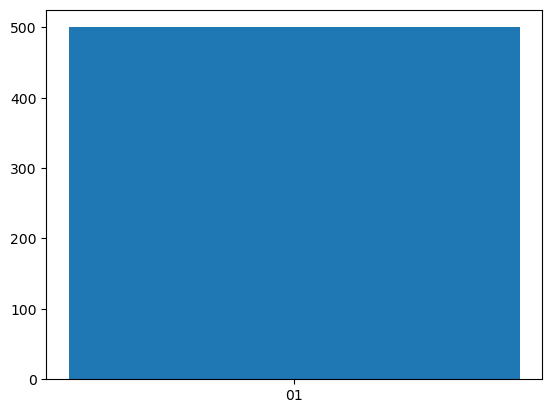

In [11]:
plt.bar(counts.keys(), counts.values())
plt.show()